In [1]:
##Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [2]:
##Filter warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
##Load the dataset and check the top 5 rows
fraud_df = pd.read_csv("fraud_detection_data_final.csv")
fraud_df.head()

,amt,trans_hour,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,...,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,age_46-60,age_61-75,age_< 30,age_> 75,is_fraud
0,134.62,23,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,109.95,5,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,20.17,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
3,839.06,22,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,4.33,10,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [4]:
#Check the datatypes of the columns
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729 entries, 0 to 4728
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amt                      4729 non-null   float64
 1   trans_hour               4729 non-null   int64  
 2   category_food_dining     4729 non-null   int64  
 3   category_gas_transport   4729 non-null   int64  
 4   category_grocery_net     4729 non-null   int64  
 5   category_grocery_pos     4729 non-null   int64  
 6   category_health_fitness  4729 non-null   int64  
 7   category_home            4729 non-null   int64  
 8   category_kids_pets       4729 non-null   int64  
 9   category_misc_net        4729 non-null   int64  
 10  category_misc_pos        4729 non-null   int64  
 11  category_personal_care   4729 non-null   int64  
 12  category_shopping_net    4729 non-null   int64  
 13  category_shopping_pos    4729 non-null   int64  
 14  category_travel         

### Q1. Numerical Attributes to Categorical Attributes

You will notice that there are 27 columns in the dataset.

Many of the categorical columns have been incorrectly stored as numerical attributes. Which of the following is the correct code to convert them to categorical attributes?

 **Hint** : Only `amt` and `trans_hour` have to be kept as numerical

In [5]:
## Write your code here
non_categorical_columns = ['amt', 'trans_hour']

for column in fraud_df.columns:
    if column not in non_categorical_columns:
        fraud_df[column] = pd.Categorical(fraud_df[column])

In [6]:
##Check the datatypes again to confirm if the conversion has happened correctly
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729 entries, 0 to 4728
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   amt                      4729 non-null   float64 
 1   trans_hour               4729 non-null   int64   
 2   category_food_dining     4729 non-null   category
 3   category_gas_transport   4729 non-null   category
 4   category_grocery_net     4729 non-null   category
 5   category_grocery_pos     4729 non-null   category
 6   category_health_fitness  4729 non-null   category
 7   category_home            4729 non-null   category
 8   category_kids_pets       4729 non-null   category
 9   category_misc_net        4729 non-null   category
 10  category_misc_pos        4729 non-null   category
 11  category_personal_care   4729 non-null   category
 12  category_shopping_net    4729 non-null   category
 13  category_shopping_pos    4729 non-null   category
 14  category

### Q2. Train-Test Split and the value of K

Peform a train-test split using test_size = 0.3 and random_state = 100.  What is the optimal value of k, the number of nearest neighbors, obtained based on accuracy using the cross-validation approach?

In [8]:
##Separate your X and y
y = fraud_df['is_fraud']
X = fraud_df.iloc[:, :-1]

In [10]:
#Perform the train test split
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=100
)

In [11]:
##Scale the numerical data
scaler = StandardScaler()
X_train[['amt','trans_hour']]= scaler.fit_transform(X_train[['amt','trans_hour']])
X_val[['amt','trans_hour']]= scaler.transform(X_val[['amt','trans_hour']])

In [12]:
###Identify the best value of k using the cross-validation approach
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,31)} # Parameter range

##Write your code here
grid = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1)
grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [13]:
grid_search.best_params_

{'n_neighbors': 14}

The maximum accuracy is obtained at k = 14


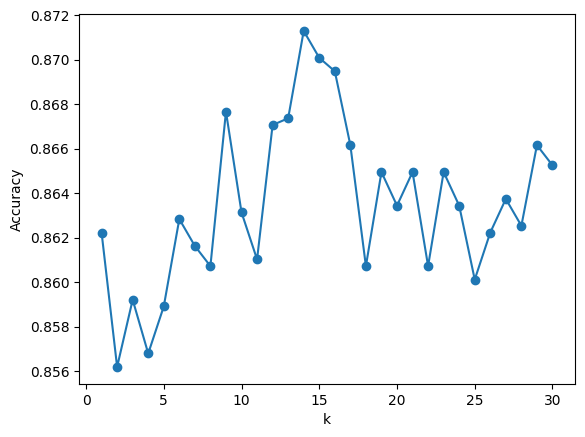

In [14]:
### Accuracy vs k
plt.plot(param_grid['n_neighbors'], grid_search.cv_results_['mean_test_score'],marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
print("The maximum accuracy is obtained at k = " + str(np.argmax(grid_search.cv_results_['mean_test_score'])+1))


### Q3. Validation Accuracy

What is the accuracy obtained for the validation set using the optimal k obtained from the previous questions?

In [15]:
##Write your code for computing the validation accuracy
knn_clf_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn_clf_best.fit(X_train, y_train)
y_pred = knn_clf_best.predict(X_val)

In [16]:
print('Validation data Accuracy Score: %.4f' % accuracy_score(y_val, y_pred))

Validation data Accuracy Score: 0.8675
